In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds_path = 'Fruit_dataset_v2/train'
test_path = 'dataset_2/Test'
width = 180
height = 180
batch_size = 32

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
ds_path = pathlib.Path(archive).with_suffix('')


In [3]:
train_img_dataset = tf.keras.preprocessing.image_dataset_from_directory(ds_path, validation_split = 0.2, subset = "training", seed = 123, labels = "inferred", color_mode = 'rgb', image_size = (width, height),  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(ds_path,validation_split=0.2,subset="validation",seed=123,image_size=(height, width),batch_size=batch_size)

class_names = train_img_dataset.class_names
print(class_names)



Found 10901 files belonging to 6 classes.
Using 8721 files for training.
Found 10901 files belonging to 6 classes.
Using 2180 files for validation.
['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


2024-08-29 12:49:42.417532: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


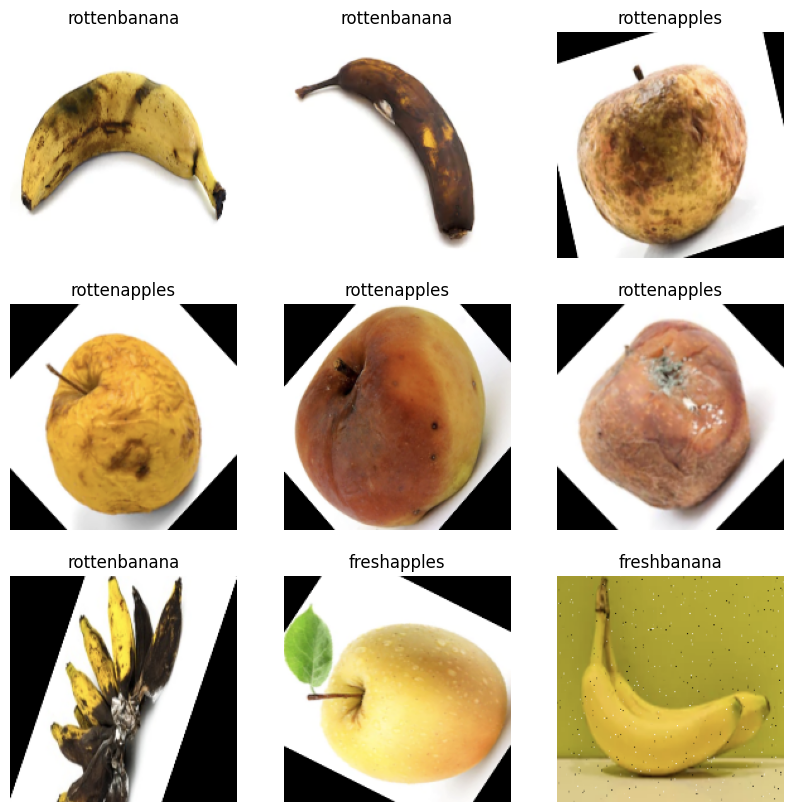

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_img_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [5]:
def normalize_layer(image, labels):
    image = tf.cast(image, tf.float32)/255.0
    return image, labels

train_img_dataset = train_img_dataset.map(normalize_layer)

for images, labels in train_img_dataset.take(1):
    print(images[0].numpy().min(), images[0].numpy().max())

                    

0.0 0.9992375


2024-08-29 12:49:53.854882: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape = (180,180,3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))
model.summary()
          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 88, 88, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 495616)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    63,438,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,459,142 (242.08 MB)

 Trainable params: 63,459,142 (242.08 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from pathlib import Path
import imghdr

data_dir = "Fruit_dataset_v2"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/var/folders/23/bqw9bhvx7ql6wndx74_rv7nw0000gn/T/ipykernel_1233/3772857580.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
import os

def remove_ds_store_files(directory):
    for root, dirs, files in os.walk(directory):
        if '.DS_Store' in files:
            os.remove(os.path.join(root, '.DS_Store'))
remove_ds_store_files('Fruit_dataset_v2')
# List all files in a directory using os.listdir
for paths in os.listdir(ds_path):
   
    print(f"looking at {paths}")
    remove_ds_store_files(paths)
    for entry in os.listdir(f"{ds_path}/{paths}"):
        if os.path.isfile(os.path.join(f"{ds_path}/{paths}", entry)):
            if entry[-3:len(entry)] == 'png' or entry[-3:len(entry)] == 'jpg':
                pass
            else:
                print(f"inside {paths}, we have found {entry}")
                

looking at freshbanana
looking at rottenbanana
looking at freshoranges
looking at freshapples
looking at rottenoranges
looking at rottenapples


In [10]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_img_dataset, batch_size = 32, epochs = 16, verbose = 2, validation_data = val_ds)



Epoch 1/16
273/273 - 284s - 1s/step - accuracy: 0.6808 - loss: 0.8526 - val_accuracy: 0.6537 - val_loss: 146.3636
Epoch 2/16
273/273 - 368s - 1s/step - accuracy: 0.8195 - loss: 0.5269 - val_accuracy: 0.6037 - val_loss: 246.0021
Epoch 3/16
273/273 - 1641s - 6s/step - accuracy: 0.8685 - loss: 0.3732 - val_accuracy: 0.6583 - val_loss: 188.1280
Epoch 4/16
273/273 - 414s - 2s/step - accuracy: 0.8865 - loss: 0.3240 - val_accuracy: 0.6092 - val_loss: 294.1531
Epoch 5/16
273/273 - 258s - 945ms/step - accuracy: 0.9124 - loss: 0.2504 - val_accuracy: 0.5982 - val_loss: 402.0157
Epoch 6/16
273/273 - 274s - 1s/step - accuracy: 0.9202 - loss: 0.2271 - val_accuracy: 0.5844 - val_loss: 466.8322
Epoch 7/16
273/273 - 287s - 1s/step - accuracy: 0.9235 - loss: 0.2102 - val_accuracy: 0.6362 - val_loss: 344.0094
Epoch 8/16
273/273 - 283s - 1s/step - accuracy: 0.9196 - loss: 0.2280 - val_accuracy: 0.5394 - val_loss: 504.8033
Epoch 9/16
273/273 - 292s - 1s/step - accuracy: 0.9397 - loss: 0.1605 - val_accuracy

KeyboardInterrupt: 

In [11]:
model.save("Fruit_Quality_Classification_Model.keras")

In [12]:
test_path = 'Fruit_Dataset_v2/test'
test_img_dataset = tf.keras.preprocessing.image_dataset_from_directory(test_path, image_size = (width, height), batch_size = 32)

class_names_1 = test_img_dataset.class_names
print(class_names_1)

test_loss, test_acc = model.evaluate(test_img_dataset, verbose = 0)
print(f"loss: {test_loss}")
print(f"accuracy: {test_acc}")

Found 2698 files belonging to 6 classes.
['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
loss: 343.36810302734375
accuracy: 0.7650111317634583


In [16]:
from PIL import Image
img = Image.open("image1.png")
new_image = img.resize((180, 180))
new_img_rgb = new_image.convert('RGB')

img_array = np.array(new_img_rgb)
predictions = model.predict(img_array[None,:,:,:])
print(predictions)
predicted_index = np.argmax(predictions, axis = 1)
print(class_names[predicted_index[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[1. 0. 0. 0. 0. 0.]]
freshapples


In [15]:
predictions[0]
test_img_dataset[0]

TypeError: '_PrefetchDataset' object is not subscriptable

In [ ]:
np.argmax(predictions[0])